## Hypothesis
My physical activity increases as my education life intensifies.

In [1]:
import xml.etree.ElementTree as et
import pandas as pd
import scipy.stats as stat
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
with open("apple_health_export/export.xml", "r") as f:
    my_data = et.parse(f)

# An example from the dataset
print(my_data.getroot()[6].attrib)
my_count = my_data.getroot()[6].attrib
print(my_count["type"], my_count["creationDate"], my_count["value"])

{'type': 'HKQuantityTypeIdentifierStepCount', 'sourceName': 'Onur’un iPhone’u', 'sourceVersion': '13.5.1', 'device': '<<HKDevice: 0x2805f4eb0>, name:iPhone, manufacturer:Apple Inc., model:iPhone, hardware:iPhone12,1, software:13.5.1>', 'unit': 'count', 'creationDate': '2020-08-29 11:33:43 +0300', 'startDate': '2020-08-29 11:23:16 +0300', 'endDate': '2020-08-29 11:32:13 +0300', 'value': '55'}
HKQuantityTypeIdentifierStepCount 2020-08-29 11:33:43 +0300 55


In [3]:
my_dict = my_data.getroot()
print(len(my_dict))

118441


In [4]:
record_list = [x.attrib for x in my_dict.iter('Record') if (x.attrib["type"] != "HKCategoryTypeIdentifierHeadphoneAudioExposureEvent") and (x.attrib["type"] != "HKQuantityTypeIdentifierBodyMass") and (x.attrib["type"] != "HKQuantityTypeIdentifierHeight")]

for record_dict in record_list:
    record_dict["value"] = float(record_dict["value"])

    if (record_dict["sourceVersion"].count(".") > 1):
        record_dict["sourceVersion"] = float(record_dict["sourceVersion"][:record_dict["sourceVersion"].find(".", (record_dict["sourceVersion"].find(".") + 1))])
    
    record_dict["deviceID"] = record_dict["device"][(record_dict["device"].find("HKDevice: ") + 10):(record_dict["device"].find(">"))]

    if (record_dict["type"] != "HKQuantityTypeIdentifierHeadphoneAudioExposure"):
        record_dict["device"] = record_dict["device"][(record_dict["device"].find("hardware:") + 9):(record_dict["device"].find("software") - 2)]
    else:
        record_dict["device"] = record_dict["device"][(record_dict["device"].find("name:") + 5):(record_dict["device"].find(",", record_dict["device"].find("name:")))]
    

## Identifier Types

Not to be considered:

* HKCategoryTypeIdentifierHeadphoneAudioExposureEvent
    * to be removed at the XML parsing - it does not contain any numeric value
* HKQuantityTypeIdentifierBodyMass
* HKQuantityTypeIdentifierHeight

To be considered:

* HKQuantityTypeIdentifierHeadphoneAudioExposure

* HKQuantityTypeIdentifierActiveEnergyBurned
* HKQuantityTypeIdentifierBasalEnergyBurned



* HKQuantityTypeIdentifierAppleWalkingSteadiness
* HKQuantityTypeIdentifierDistanceWalkingRunning
* HKQuantityTypeIdentifierFlightsClimbed
* HKQuantityTypeIdentifierStepCount
* HKQuantityTypeIdentifierWalkingAsymmetryPercentage
* HKQuantityTypeIdentifierWalkingDoubleSupportPercentage
* HKQuantityTypeIdentifierWalkingSpeed
* HKQuantityTypeIdentifierWalkingStepLength

Dataframe consisting of all the data

In [5]:
my_all_data = pd.DataFrame(record_list)

# Conversion of dates and times into datetime objects
my_all_data["creationDate"] = pd.to_datetime(my_all_data["creationDate"])
my_all_data["startDate"] = pd.to_datetime(my_all_data["startDate"])
my_all_data["endDate"] = pd.to_datetime(my_all_data["endDate"])

# Source name is "Onur'un iPhone'u" in all cases
my_all_data = my_all_data.drop(columns = ["sourceName"])

my_all_data

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierStepCount,13.5,"iPhone12,1",count,2020-08-29 11:33:43+03:00,2020-08-29 11:23:16+03:00,2020-08-29 11:32:13+03:00,55.0,0x2805f4eb0
1,HKQuantityTypeIdentifierStepCount,13.5,"iPhone12,1",count,2020-08-29 11:44:33+03:00,2020-08-29 11:32:15+03:00,2020-08-29 11:42:16+03:00,667.0,0x2805f4eb0
2,HKQuantityTypeIdentifierStepCount,13.5,"iPhone12,1",count,2020-08-29 11:54:40+03:00,2020-08-29 11:42:16+03:00,2020-08-29 11:48:59+03:00,501.0,0x2805f4eb0
3,HKQuantityTypeIdentifierStepCount,11.0,"iPhone9,3",count,2017-11-23 22:32:12+03:00,2017-11-23 22:20:45+03:00,2017-11-23 22:22:34+03:00,22.0,0x2805f5270
4,HKQuantityTypeIdentifierStepCount,11.0,"iPhone9,3",count,2017-11-24 08:21:36+03:00,2017-11-24 07:45:13+03:00,2017-11-24 07:55:11+03:00,122.0,0x2805f5270
...,...,...,...,...,...,...,...,...,...
117978,HKQuantityTypeIdentifierAppleWalkingSteadiness,2886.1,"iPhone12,1",%,2023-10-12 09:04:49+03:00,2023-10-05 03:00:00+03:00,2023-10-12 03:00:00+03:00,1.0,0x280540500
117979,HKQuantityTypeIdentifierAppleWalkingSteadiness,2886.1,"iPhone12,1",%,2023-10-19 08:12:23+03:00,2023-10-12 03:00:00+03:00,2023-10-19 03:00:00+03:00,1.0,0x280540500
117980,HKQuantityTypeIdentifierAppleWalkingSteadiness,2886.1,"iPhone12,1",%,2023-10-26 08:39:04+03:00,2023-10-19 03:00:00+03:00,2023-10-26 03:00:00+03:00,1.0,0x280540500
117981,HKQuantityTypeIdentifierAppleWalkingSteadiness,2890.0,"iPhone12,1",%,2023-11-02 09:05:53+03:00,2023-10-26 03:00:00+03:00,2023-11-02 03:00:00+03:00,1.0,0x280540550


Dataframes directly related to physical activity

In [6]:
my_steps = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierStepCount"].reset_index().drop(columns = ["index"])
my_steps.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierStepCount,13.5,"iPhone12,1",count,2020-08-29 11:33:43+03:00,2020-08-29 11:23:16+03:00,2020-08-29 11:32:13+03:00,55.0,0x2805f4eb0
1,HKQuantityTypeIdentifierStepCount,13.5,"iPhone12,1",count,2020-08-29 11:44:33+03:00,2020-08-29 11:32:15+03:00,2020-08-29 11:42:16+03:00,667.0,0x2805f4eb0
2,HKQuantityTypeIdentifierStepCount,13.5,"iPhone12,1",count,2020-08-29 11:54:40+03:00,2020-08-29 11:42:16+03:00,2020-08-29 11:48:59+03:00,501.0,0x2805f4eb0
3,HKQuantityTypeIdentifierStepCount,11.0,"iPhone9,3",count,2017-11-23 22:32:12+03:00,2017-11-23 22:20:45+03:00,2017-11-23 22:22:34+03:00,22.0,0x2805f5270
4,HKQuantityTypeIdentifierStepCount,11.0,"iPhone9,3",count,2017-11-24 08:21:36+03:00,2017-11-24 07:45:13+03:00,2017-11-24 07:55:11+03:00,122.0,0x2805f5270


In [7]:
my_distances = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierDistanceWalkingRunning"].reset_index().drop(columns = ["index"])
my_distances.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierDistanceWalkingRunning,13.5,"iPhone12,1",km,2020-08-29 11:33:43+03:00,2020-08-29 11:23:16+03:00,2020-08-29 11:32:13+03:00,0.03644,0x2806c1090
1,HKQuantityTypeIdentifierDistanceWalkingRunning,13.5,"iPhone12,1",km,2020-08-29 11:44:33+03:00,2020-08-29 11:32:15+03:00,2020-08-29 11:42:16+03:00,0.47539,0x2806c1090
2,HKQuantityTypeIdentifierDistanceWalkingRunning,13.5,"iPhone12,1",km,2020-08-29 11:54:40+03:00,2020-08-29 11:42:16+03:00,2020-08-29 11:48:59+03:00,0.35122,0x2806c1090
3,HKQuantityTypeIdentifierDistanceWalkingRunning,11.0,"iPhone9,3",km,2017-11-23 22:32:12+03:00,2017-11-23 22:20:45+03:00,2017-11-23 22:22:34+03:00,0.00980,0x2806cc1e0
4,HKQuantityTypeIdentifierDistanceWalkingRunning,11.0,"iPhone9,3",km,2017-11-24 08:21:36+03:00,2017-11-24 07:45:13+03:00,2017-11-24 07:55:11+03:00,0.07920,0x2806cc1e0


In [8]:
my_climbed = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierFlightsClimbed"].reset_index().drop(columns = ["index"])
my_climbed.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierFlightsClimbed,13.5,"iPhone12,1",count,2020-08-29 12:01:30+03:00,2020-08-29 11:48:05+03:00,2020-08-29 11:48:51+03:00,4.0,0x2806663f0
1,HKQuantityTypeIdentifierFlightsClimbed,11.0,"iPhone9,3",count,2017-11-24 08:21:37+03:00,2017-11-24 08:08:41+03:00,2017-11-24 08:08:41+03:00,1.0,0x280666cb0
2,HKQuantityTypeIdentifierFlightsClimbed,11.0,"iPhone9,3",count,2017-11-24 16:37:17+03:00,2017-11-24 10:54:49+03:00,2017-11-24 10:54:49+03:00,1.0,0x280666cb0
3,HKQuantityTypeIdentifierFlightsClimbed,11.0,"iPhone9,3",count,2017-11-24 16:37:17+03:00,2017-11-24 12:31:57+03:00,2017-11-24 12:31:57+03:00,1.0,0x280666cb0
4,HKQuantityTypeIdentifierFlightsClimbed,11.0,"iPhone9,3",count,2017-11-24 16:37:17+03:00,2017-11-24 14:06:04+03:00,2017-11-24 14:06:04+03:00,1.0,0x280666cb0


In [9]:
my_step_length = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierWalkingStepLength"].reset_index().drop(columns = ["index"])
my_step_length.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierWalkingStepLength,14.0,"iPhone12,1",cm,2020-09-21 09:06:06+03:00,2020-09-21 08:55:43+03:00,2020-09-21 08:56:55+03:00,84.0,0x2805402d0
1,HKQuantityTypeIdentifierWalkingStepLength,14.0,"iPhone12,1",cm,2020-09-21 10:32:19+03:00,2020-09-21 10:20:34+03:00,2020-09-21 10:20:50+03:00,82.0,0x2805402d0
2,HKQuantityTypeIdentifierWalkingStepLength,14.0,"iPhone12,1",cm,2020-09-21 10:32:19+03:00,2020-09-21 10:22:17+03:00,2020-09-21 10:22:26+03:00,90.0,0x2805402d0
3,HKQuantityTypeIdentifierWalkingStepLength,14.0,"iPhone12,1",cm,2020-09-21 13:01:57+03:00,2020-09-21 12:50:43+03:00,2020-09-21 12:50:47+03:00,72.0,0x2805402d0
4,HKQuantityTypeIdentifierWalkingStepLength,14.0,"iPhone12,1",cm,2020-09-21 13:01:57+03:00,2020-09-21 12:51:06+03:00,2020-09-21 12:52:19+03:00,74.0,0x2805402d0


In [10]:
my_walking_speed = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierWalkingSpeed"].reset_index().drop(columns = ["index"])
my_walking_speed.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierWalkingSpeed,14.0,"iPhone12,1",km/hr,2020-09-21 09:06:06+03:00,2020-09-21 08:55:43+03:00,2020-09-21 08:56:55+03:00,6.336,0x280540190
1,HKQuantityTypeIdentifierWalkingSpeed,14.0,"iPhone12,1",km/hr,2020-09-21 10:32:19+03:00,2020-09-21 10:20:34+03:00,2020-09-21 10:20:50+03:00,6.120,0x280540190
2,HKQuantityTypeIdentifierWalkingSpeed,14.0,"iPhone12,1",km/hr,2020-09-21 10:32:19+03:00,2020-09-21 10:22:17+03:00,2020-09-21 10:22:26+03:00,6.876,0x280540190
3,HKQuantityTypeIdentifierWalkingSpeed,14.0,"iPhone12,1",km/hr,2020-09-21 13:01:57+03:00,2020-09-21 12:50:43+03:00,2020-09-21 12:50:47+03:00,4.176,0x280540190
4,HKQuantityTypeIdentifierWalkingSpeed,14.0,"iPhone12,1",km/hr,2020-09-21 13:01:57+03:00,2020-09-21 12:51:06+03:00,2020-09-21 12:52:19+03:00,4.824,0x280540190


In [11]:
my_walking_asymmetry = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierWalkingAsymmetryPercentage"].reset_index().drop(columns = ["index"])
my_walking_asymmetry.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,14.0,"iPhone12,1",%,2020-09-21 09:06:06+03:00,2020-09-21 08:55:43+03:00,2020-09-21 08:56:55+03:00,0.00,0x280540190
1,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,14.0,"iPhone12,1",%,2020-09-21 10:32:19+03:00,2020-09-21 10:20:34+03:00,2020-09-21 10:20:50+03:00,0.07,0x280540190
2,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,14.0,"iPhone12,1",%,2020-09-21 13:01:57+03:00,2020-09-21 12:51:06+03:00,2020-09-21 12:52:19+03:00,0.00,0x280540190
3,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,14.0,"iPhone12,1",%,2020-09-22 12:17:56+03:00,2020-09-22 09:49:28+03:00,2020-09-22 09:50:48+03:00,0.00,0x280540190
4,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,14.0,"iPhone12,1",%,2020-09-22 12:40:06+03:00,2020-09-22 12:18:35+03:00,2020-09-22 12:18:59+03:00,0.00,0x280540190


In [12]:
my_walking_double_support = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierWalkingDoubleSupportPercentage"].reset_index().drop(columns = ["index"])
my_walking_double_support.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,14.0,"iPhone12,1",%,2020-09-21 09:06:06+03:00,2020-09-21 08:55:43+03:00,2020-09-21 08:56:55+03:00,0.228,0x2805e6cb0
1,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,14.0,"iPhone12,1",%,2020-09-21 10:32:19+03:00,2020-09-21 10:20:34+03:00,2020-09-21 10:20:50+03:00,0.236,0x2805e6cb0
2,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,14.0,"iPhone12,1",%,2020-09-21 10:32:19+03:00,2020-09-21 10:22:17+03:00,2020-09-21 10:22:26+03:00,0.225,0x2805e6cb0
3,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,14.0,"iPhone12,1",%,2020-09-21 13:01:57+03:00,2020-09-21 12:50:43+03:00,2020-09-21 12:50:47+03:00,0.306,0x2805e6cb0
4,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,14.0,"iPhone12,1",%,2020-09-21 13:01:57+03:00,2020-09-21 12:51:06+03:00,2020-09-21 12:52:19+03:00,0.275,0x2805e6cb0


In [13]:
my_walking_steady = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierAppleWalkingSteadiness"].reset_index().drop(columns = ["index"])
my_walking_steady.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierAppleWalkingSteadiness,2775.0,"iPhone12,1",%,2022-09-16 22:58:11+03:00,2022-06-25 03:00:00+03:00,2022-07-02 03:00:00+03:00,1.000000,0x280540190
1,HKQuantityTypeIdentifierAppleWalkingSteadiness,2775.0,"iPhone12,1",%,2022-09-16 22:58:11+03:00,2022-07-02 03:00:00+03:00,2022-07-09 03:00:00+03:00,1.000000,0x280540190
2,HKQuantityTypeIdentifierAppleWalkingSteadiness,2775.0,"iPhone12,1",%,2022-09-16 22:58:11+03:00,2022-07-10 03:00:00+03:00,2022-07-17 03:00:00+03:00,1.000000,0x280540190
3,HKQuantityTypeIdentifierAppleWalkingSteadiness,2775.0,"iPhone12,1",%,2022-09-16 22:58:11+03:00,2022-07-17 03:00:00+03:00,2022-07-24 03:00:00+03:00,0.945581,0x280540190
4,HKQuantityTypeIdentifierAppleWalkingSteadiness,2775.0,"iPhone12,1",%,2022-09-16 22:58:11+03:00,2022-07-24 03:00:00+03:00,2022-07-31 03:00:00+03:00,0.805529,0x280540190


Dataframes related to burned energy statistics

In [14]:
my_active_energy = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierActiveEnergyBurned"].reset_index().drop(columns = ['index'])
my_active_energy.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierActiveEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-16 00:01:22+03:00,2022-09-16 00:02:04+03:00,0.078,0x2806f0eb0
1,HKQuantityTypeIdentifierActiveEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-16 00:15:33+03:00,2022-09-16 00:15:44+03:00,0.038,0x2806f0eb0
2,HKQuantityTypeIdentifierActiveEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-16 09:31:12+03:00,2022-09-16 09:39:46+03:00,0.098,0x2806f0eb0
3,HKQuantityTypeIdentifierActiveEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-16 10:37:43+03:00,2022-09-16 10:44:24+03:00,0.638,0x2806f0eb0
4,HKQuantityTypeIdentifierActiveEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-16 10:55:21+03:00,2022-09-16 10:58:32+03:00,0.686,0x2806f0eb0


In [15]:
my_basal_energy = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierBasalEnergyBurned"].reset_index().drop(columns = ['index'])
my_basal_energy.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierBasalEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-15 22:19:01+03:00,2022-09-15 22:34:05+03:00,17.963,0x2806c0190
1,HKQuantityTypeIdentifierBasalEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-15 22:34:05+03:00,2022-09-15 22:49:09+03:00,17.965,0x2806c0190
2,HKQuantityTypeIdentifierBasalEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-15 22:49:09+03:00,2022-09-15 23:04:13+03:00,17.954,0x2806c0190
3,HKQuantityTypeIdentifierBasalEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-15 23:04:13+03:00,2022-09-15 23:18:47+03:00,17.351,0x2806c0190
4,HKQuantityTypeIdentifierBasalEnergyBurned,16.0,"iPhone12,1",kcal,2022-09-16 22:19:16+03:00,2022-09-15 23:18:47+03:00,2022-09-15 23:33:41+03:00,17.758,0x2806c0190


Dataframe related to headphone audio statistics

In [16]:
my_headphone_audio = my_all_data[my_all_data["type"] == "HKQuantityTypeIdentifierHeadphoneAudioExposure"].reset_index().drop(columns = ['index'])
my_headphone_audio.head()

,type,sourceVersion,device,unit,creationDate,startDate,endDate,value,deviceID
0,HKQuantityTypeIdentifierHeadphoneAudioExposure,13.1,EarPods,dBASPL,2019-10-01 23:39:10+03:00,2019-10-01 23:29:23+03:00,2019-10-01 23:38:40+03:00,82.5818,0x28065ead0
1,HKQuantityTypeIdentifierHeadphoneAudioExposure,13.1,EarPods,dBASPL,2019-10-01 23:53:20+03:00,2019-10-01 23:42:19+03:00,2019-10-01 23:51:47+03:00,83.0852,0x28065ead0
2,HKQuantityTypeIdentifierHeadphoneAudioExposure,13.1,EarPods,dBASPL,2019-10-01 23:53:20+03:00,2019-10-01 23:51:48+03:00,2019-10-01 23:51:51+03:00,84.4894,0x28065ead0
3,HKQuantityTypeIdentifierHeadphoneAudioExposure,13.1,EarPods,dBASPL,2019-10-01 23:53:20+03:00,2019-10-01 23:51:50+03:00,2019-10-01 23:52:24+03:00,83.5434,0x28065ead0
4,HKQuantityTypeIdentifierHeadphoneAudioExposure,13.1,EarPods,dBASPL,2019-10-01 23:59:44+03:00,2019-10-01 23:52:46+03:00,2019-10-01 23:56:38+03:00,76.4813,0x28065ead0


## Exploratory data analysis of the dataframes

The dataframe containing all the data

In [17]:
print(my_all_data.shape, "\n")
print(my_all_data.dtypes)
my_all_data.describe()

(117983, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,117983.000000
mean,45.667557
std,102.935253
min,0.000000
25%,0.213000
50%,10.000000
75%,69.000000
max,11094.000000


Dataframes directly related to physical activity

In [18]:
print(my_steps.shape, "\n")
print(my_steps.dtypes)
my_steps.describe()

(24049, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,24049.000000
mean,121.505801
std,201.071968
min,1.000000
25%,13.000000
50%,34.000000
75%,154.000000
max,11094.000000


In [19]:
print(my_distances.shape, "\n")
print(my_distances.dtypes)
my_distances.describe()

(23992, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,23992.000000
mean,0.085136
std,0.146155
min,0.000390
25%,0.008880
50%,0.022840
75%,0.103450
max,7.895340


In [20]:
print(my_climbed.shape, "\n")
print(my_climbed.dtypes)
my_climbed.describe()

(4888, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,4888.000000
mean,1.939444
std,1.443292
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,18.000000


In [21]:
print(my_step_length.shape, "\n")
print(my_step_length.dtypes)
my_step_length.describe()

(6433, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,6433.000000
mean,74.494482
std,14.136979
min,25.000000
25%,64.000000
50%,74.000000
75%,85.000000
max,136.000000


In [22]:
print(my_walking_speed.shape, "\n")
print(my_walking_speed.dtypes)
my_walking_speed.describe()

(6433, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,6433.000000
mean,4.838903
std,1.376157
min,1.548000
25%,3.708000
50%,4.788000
75%,6.048000
max,8.136000


In [23]:
print(my_walking_asymmetry.shape, "\n")
print(my_walking_asymmetry.dtypes)
my_walking_asymmetry.describe()

(2836, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,2836.000000
mean,0.070339
std,0.179761
min,0.000000
25%,0.000000
50%,0.000000
75%,0.040000
max,1.000000


In [24]:
print(my_walking_double_support.shape, "\n")
print(my_walking_double_support.dtypes)
my_walking_double_support.describe()

(4528, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,4528.000000
mean,0.269955
std,0.033310
min,0.172000
25%,0.241000
50%,0.268000
75%,0.298000
max,0.364000


In [25]:
print(my_walking_steady.shape, "\n")
print(my_walking_steady.dtypes)
my_walking_steady.describe()

(53, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,53.000000
mean,0.995304
std,0.027600
min,0.805529
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


Dataframes related to burned energy statistics

In [26]:
print(my_active_energy.shape, "\n")
print(my_active_energy.dtypes)
my_active_energy.describe()

(7140, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,7140.000000
mean,3.107266
std,7.728980
min,0.001000
25%,0.035000
50%,0.080000
75%,1.298750
max,87.983000


In [27]:
print(my_basal_energy.shape, "\n")
print(my_basal_energy.dtypes)
my_basal_energy.describe()

(19610, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,19610.000000
mean,38.663243
std,30.811339
min,0.203000
25%,11.454250
50%,26.253000
75%,74.805000
max,147.352000


Dataframe related to headphone audio statistics

In [28]:
print(my_headphone_audio.shape, "\n")
print(my_headphone_audio.dtypes)
my_headphone_audio.describe()

(18021, 9) 

type                                object
sourceVersion                       object
device                              object
unit                                object
creationDate     datetime64[ns, UTC+03:00]
startDate        datetime64[ns, UTC+03:00]
endDate          datetime64[ns, UTC+03:00]
value                              float64
deviceID                            object
dtype: object


,value
count,18021.000000
mean,64.490399
std,21.451476
min,0.000000
25%,55.232000
50%,67.173400
75%,80.299100
max,102.826000


## Visualizations of the categorical dataframes

### Histograms of the categorical dataframes

Dataframes directly related to physical activity

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


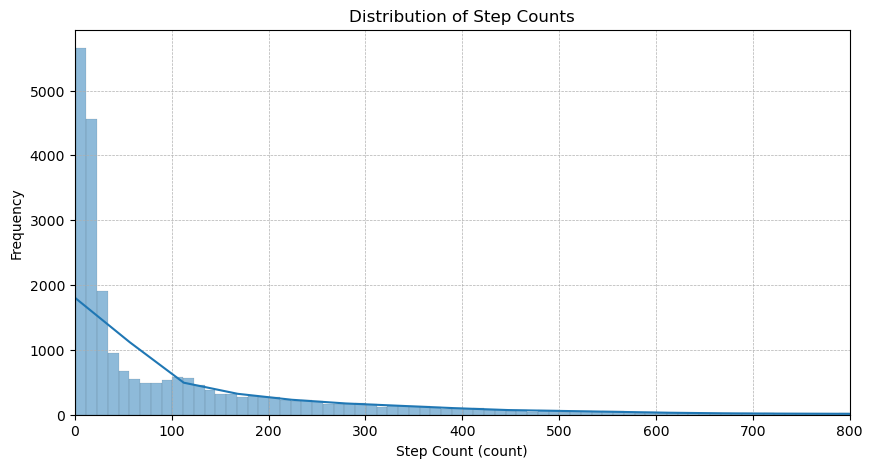

In [105]:
plt.figure(figsize=(10, 5))
sns.histplot(my_steps["value"], kde = True, bins = 1000)
plt.title('Distribution of Step Counts')
plt.xlim(0, 800)
plt.xlabel('Step Count (' + my_steps["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


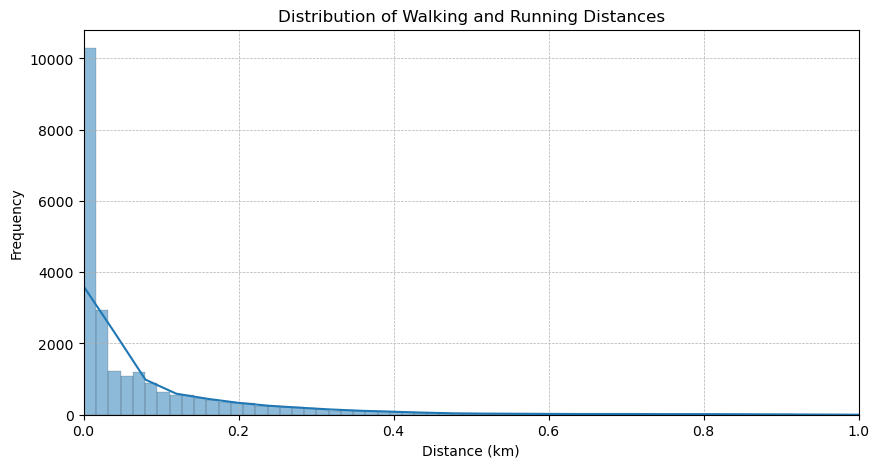

In [106]:
plt.figure(figsize=(10, 5))
sns.histplot(my_distances["value"], kde = True, bins = 500)
plt.title('Distribution of Walking and Running Distances')
plt.xlim(0, 1)
plt.xlabel('Distance (' + my_distances["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


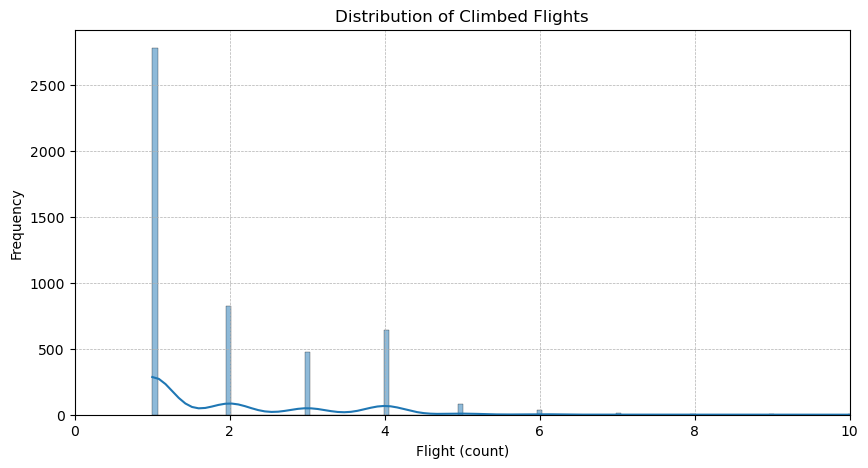

In [110]:
plt.figure(figsize=(10, 5))
sns.histplot(my_climbed["value"], kde = True, bins = 250)
plt.title("Distribution of Climbed Flights")
plt.xlim(0, 10)
plt.xlabel('Flight (' + my_climbed["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


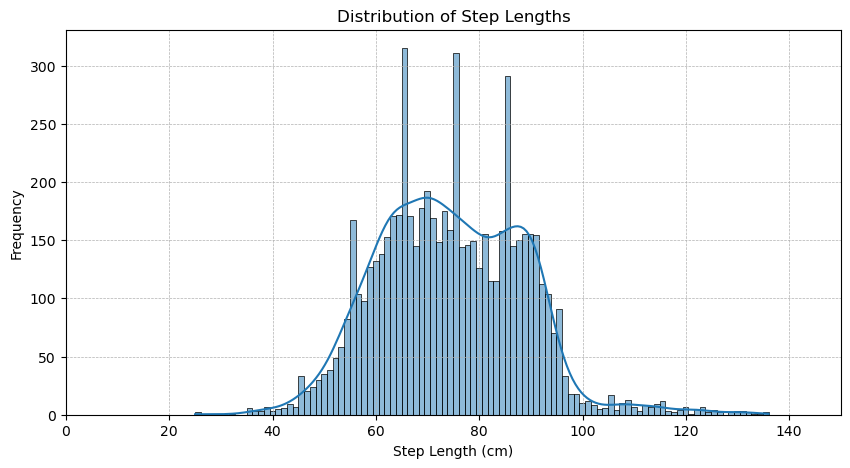

In [111]:
plt.figure(figsize=(10, 5))
sns.histplot(my_step_length["value"], kde = True, bins = 100)
plt.title('Distribution of Step Lengths')
plt.xlim(0, 150)
plt.xlabel('Step Length (' + my_step_length["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


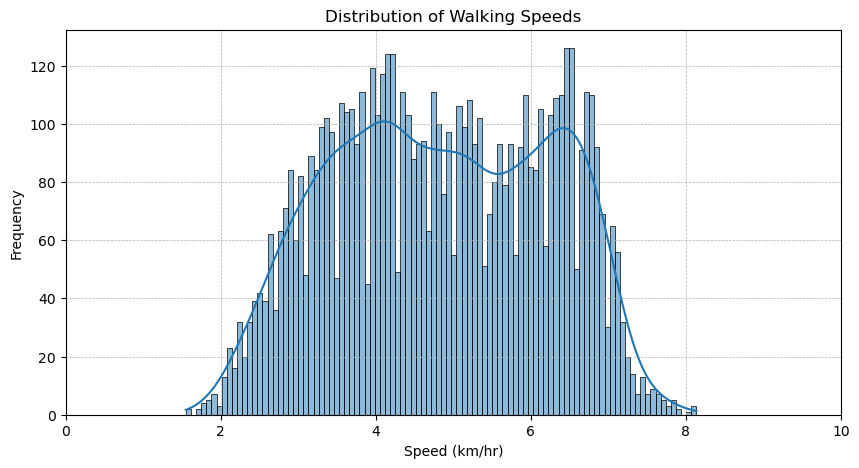

In [112]:
plt.figure(figsize=(10, 5))
sns.histplot(my_walking_speed["value"], kde = True, bins = 100)
plt.title('Distribution of Walking Speeds')
plt.xlim(0, 10)
plt.xlabel('Speed (' + my_walking_speed["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


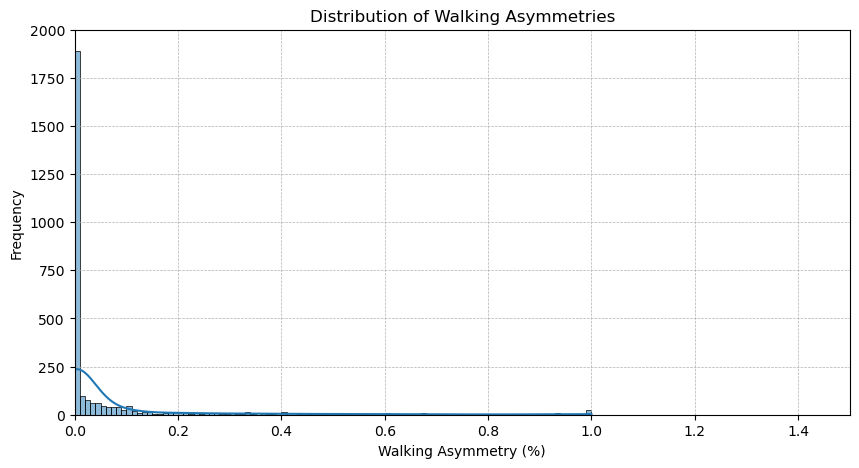

In [113]:
plt.figure(figsize=(10, 5))
sns.histplot(my_walking_asymmetry["value"], kde = True, bins = 100)
plt.title('Distribution of Walking Asymmetries')
plt.xlim(0, 1.5)
plt.ylim(0, 2000)
plt.xlabel('Walking Asymmetry (' + my_walking_asymmetry["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


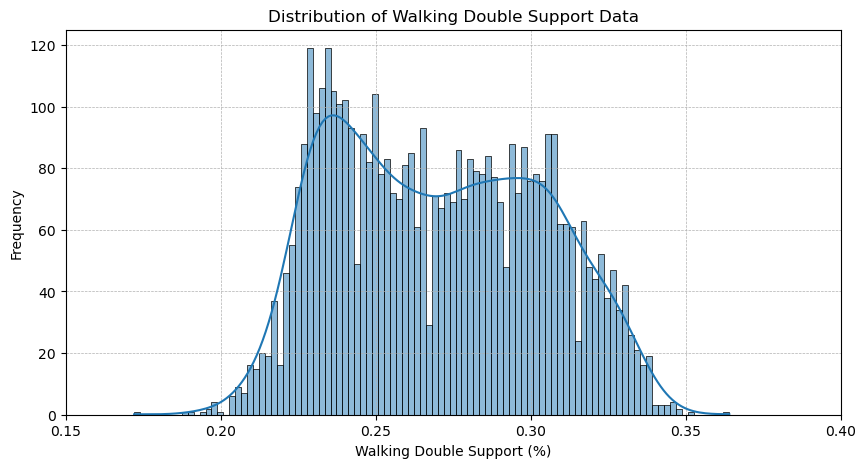

In [114]:
plt.figure(figsize=(10, 5))
sns.histplot(my_walking_double_support["value"], kde = True, bins = 100)
plt.title('Distribution of Walking Double Support Data')
plt.xlim(0.15, 0.4)
plt.xlabel('Walking Double Support (' + my_walking_double_support["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


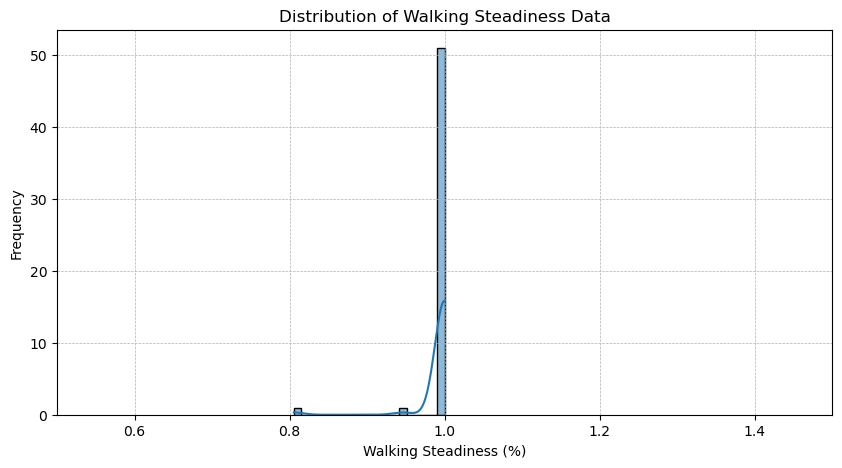

In [115]:
plt.figure(figsize=(10, 5))
sns.histplot(my_walking_steady["value"], kde = True, bins = 20)
plt.title('Distribution of Walking Steadiness Data')
plt.xlim(0.5, 1.5)
plt.xlabel('Walking Steadiness (' + my_walking_steady["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Dataframes related to burned energy statistics

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


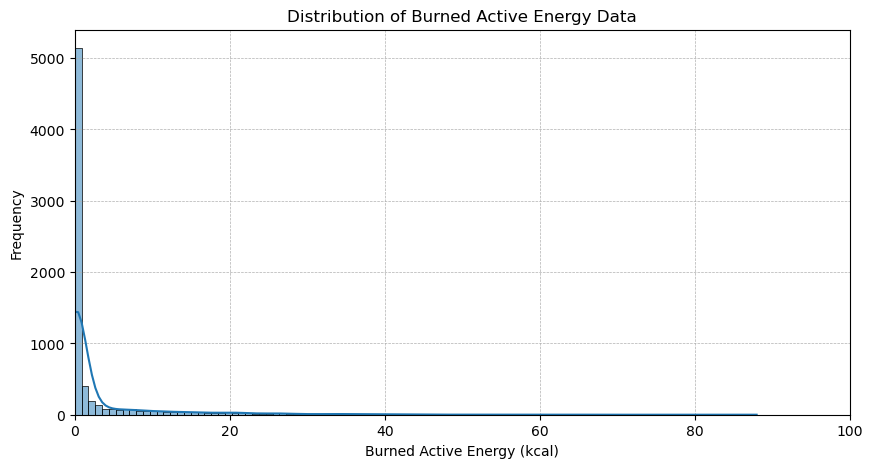

In [116]:
plt.figure(figsize=(10, 5))
sns.histplot(my_active_energy["value"], kde = True, bins = 100)
plt.title('Distribution of Burned Active Energy Data')
plt.xlim(0, 100)
plt.xlabel('Burned Active Energy (' + my_active_energy["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


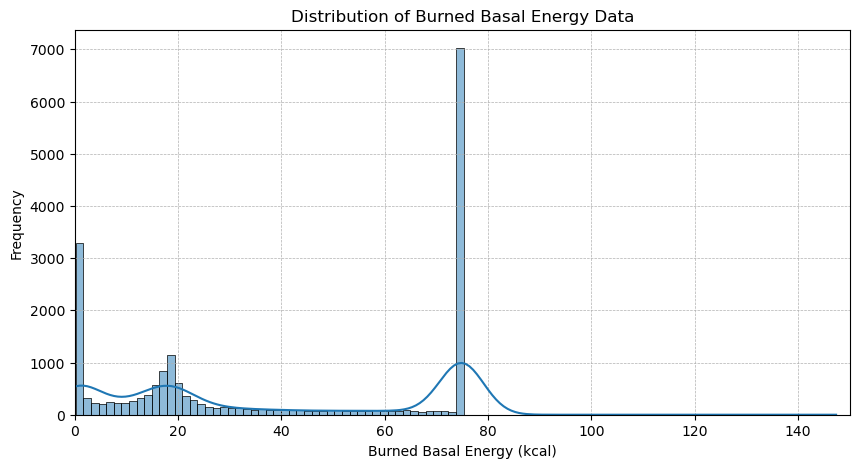

In [117]:
plt.figure(figsize=(10, 5))
sns.histplot(my_basal_energy["value"], kde = True, bins = 100)
plt.title('Distribution of Burned Basal Energy Data')
plt.xlim(0, 150)
plt.xlabel('Burned Basal Energy (' + my_basal_energy["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Dataframes related to headphone audio statistics

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


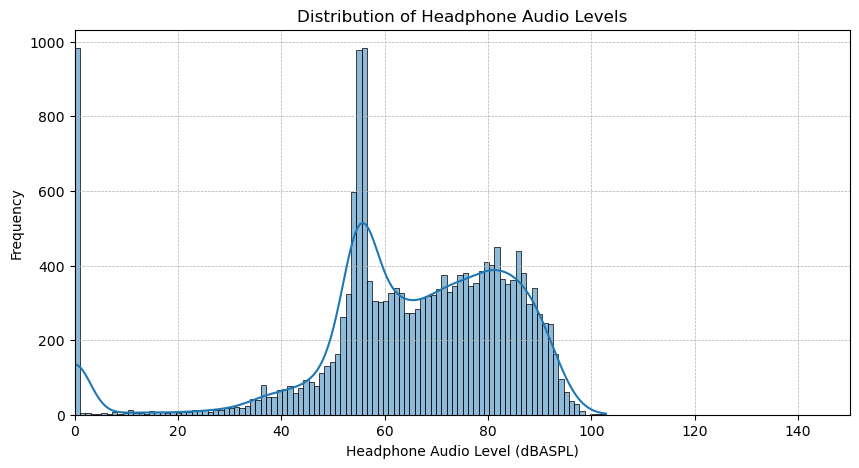

In [118]:
plt.figure(figsize=(10, 5))
sns.histplot(my_headphone_audio["value"], kde = True, bins = 100)
plt.title('Distribution of Headphone Audio Levels')
plt.xlim(0, 150)
plt.xlabel('Headphone Audio Level (' + my_headphone_audio["unit"][0] + ")")
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Line charts demonstrating the change of data over time

Dataframes directly related to physical activity

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


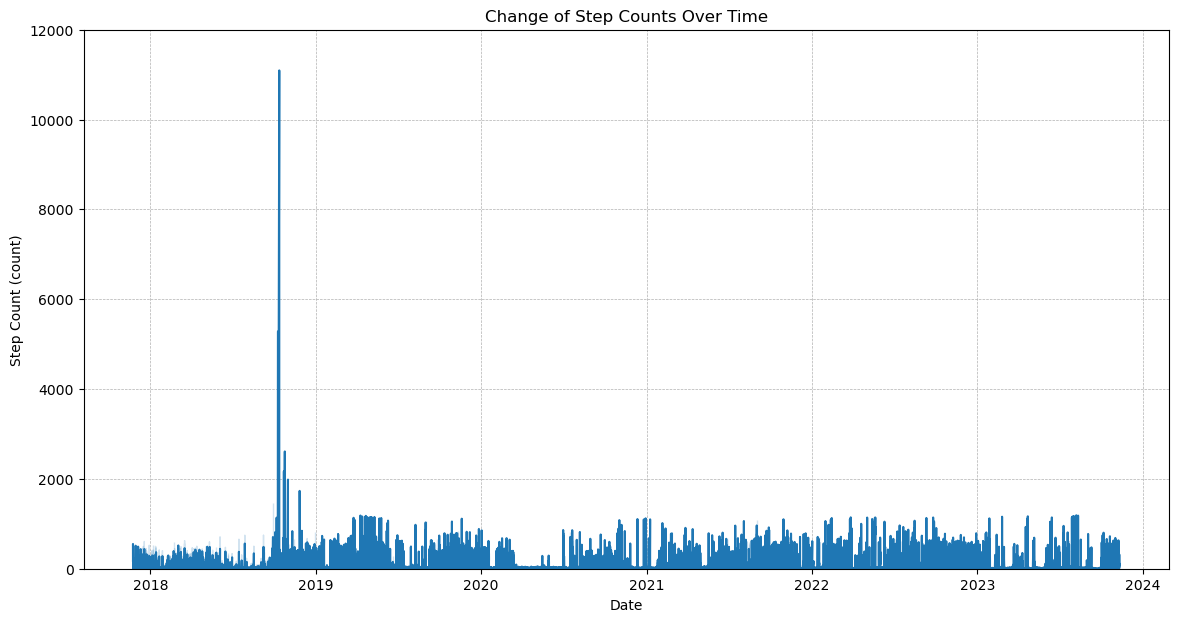

In [119]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_steps["creationDate"], y = my_steps["value"])
plt.title('Change of Step Counts Over Time')
plt.ylim(0, 12000)
plt.xlabel('Date')
plt.ylabel('Step Count (' + my_steps["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


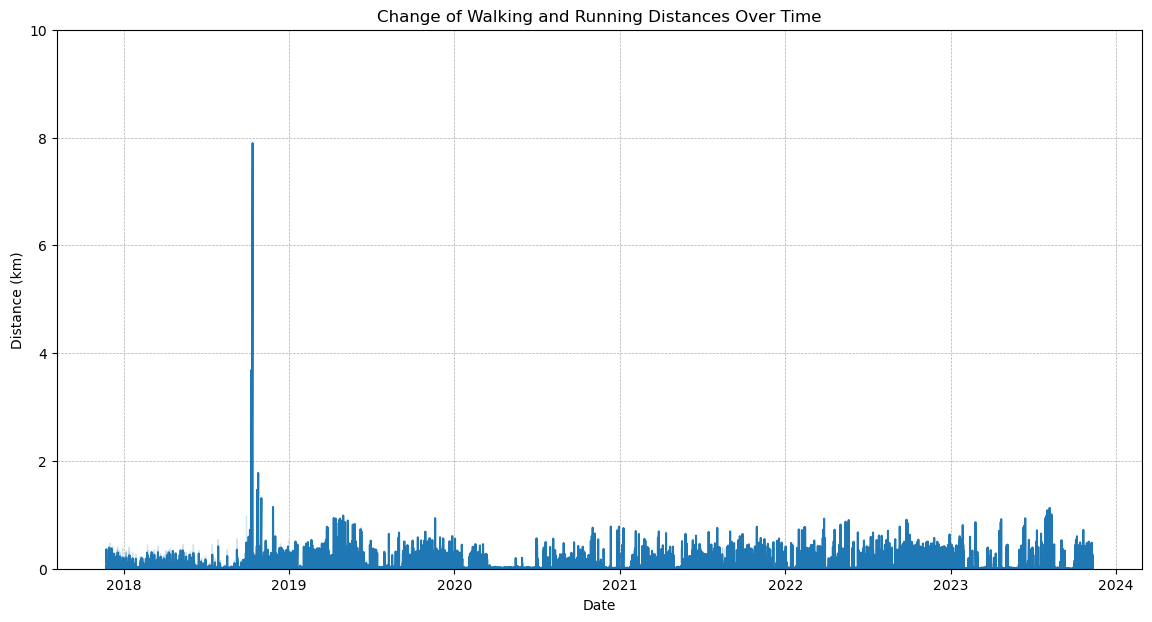

In [120]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_distances["creationDate"], y = my_distances["value"])
plt.title('Change of Walking and Running Distances Over Time')
plt.ylim(0, 10)
plt.xlabel('Date')
plt.ylabel('Distance (' + my_distances["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


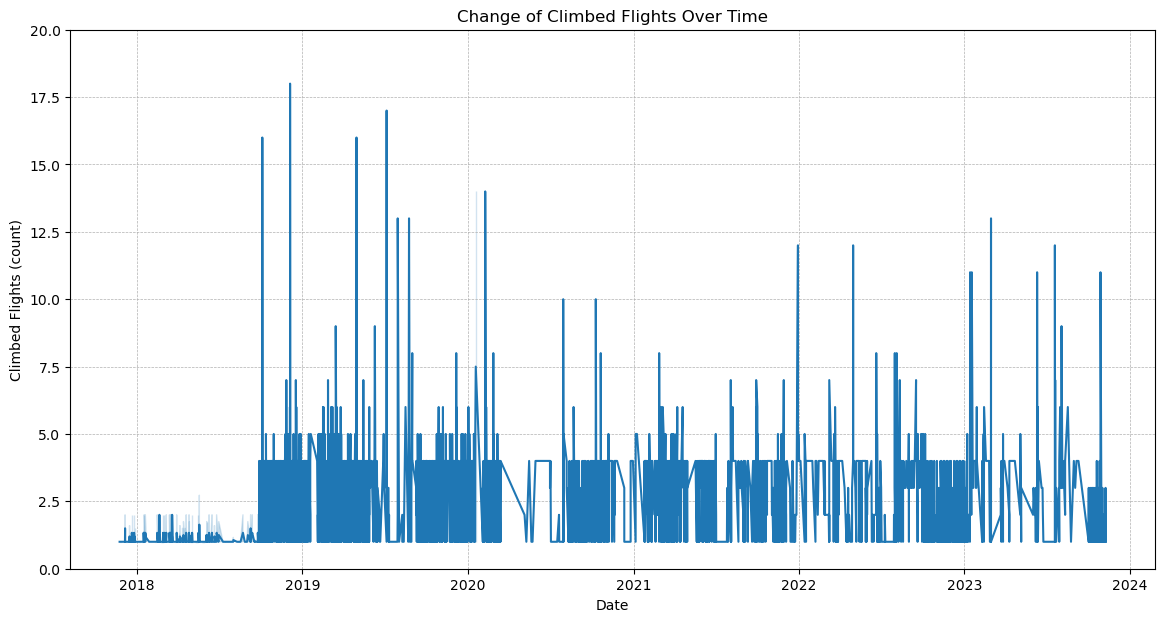

In [121]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_climbed["creationDate"], y = my_climbed["value"])
plt.title('Change of Climbed Flights Over Time')
plt.ylim(0, 20)
plt.xlabel('Date')
plt.ylabel('Climbed Flights (' + my_climbed["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


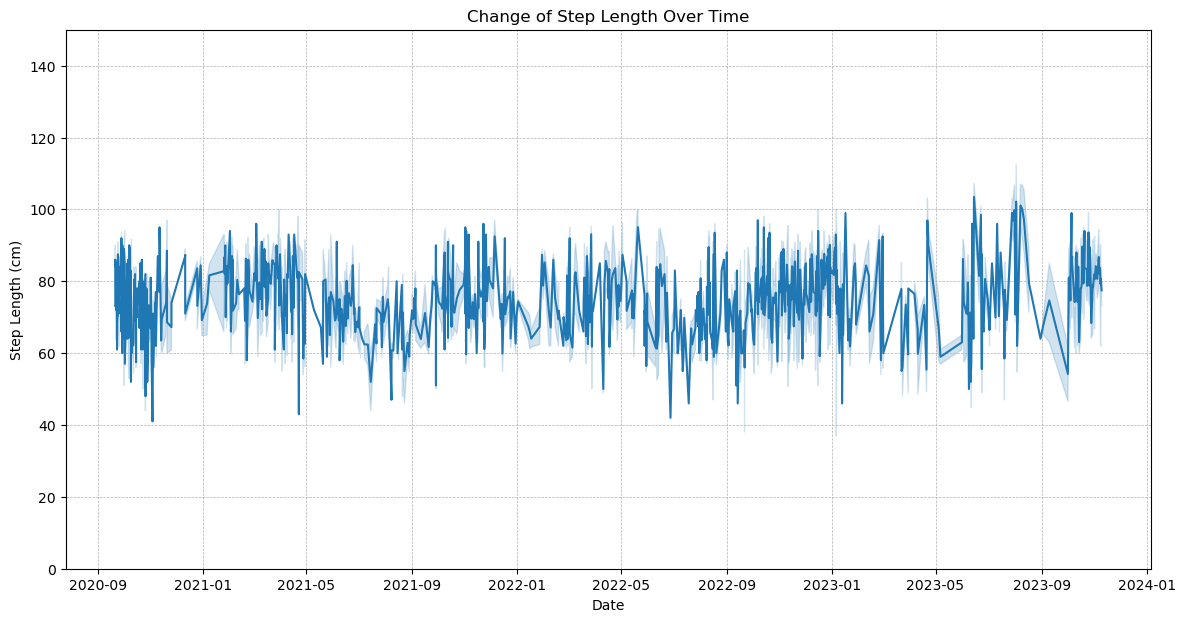

In [122]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_step_length["creationDate"], y = my_step_length["value"])
plt.title('Change of Step Length Over Time')
plt.ylim(0, 150)
plt.xlabel('Date')
plt.ylabel('Step Length (' + my_step_length["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


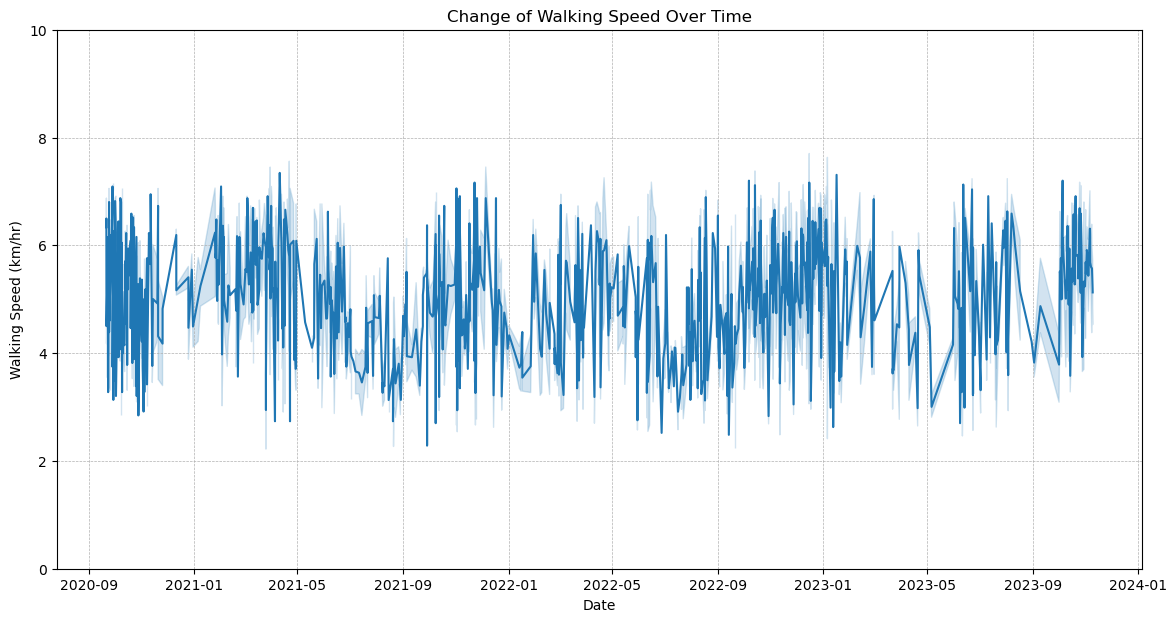

In [123]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_walking_speed["creationDate"], y = my_walking_speed["value"])
plt.title('Change of Walking Speed Over Time')
plt.ylim(0, 10)
plt.xlabel('Date')
plt.ylabel('Walking Speed (' + my_walking_speed["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


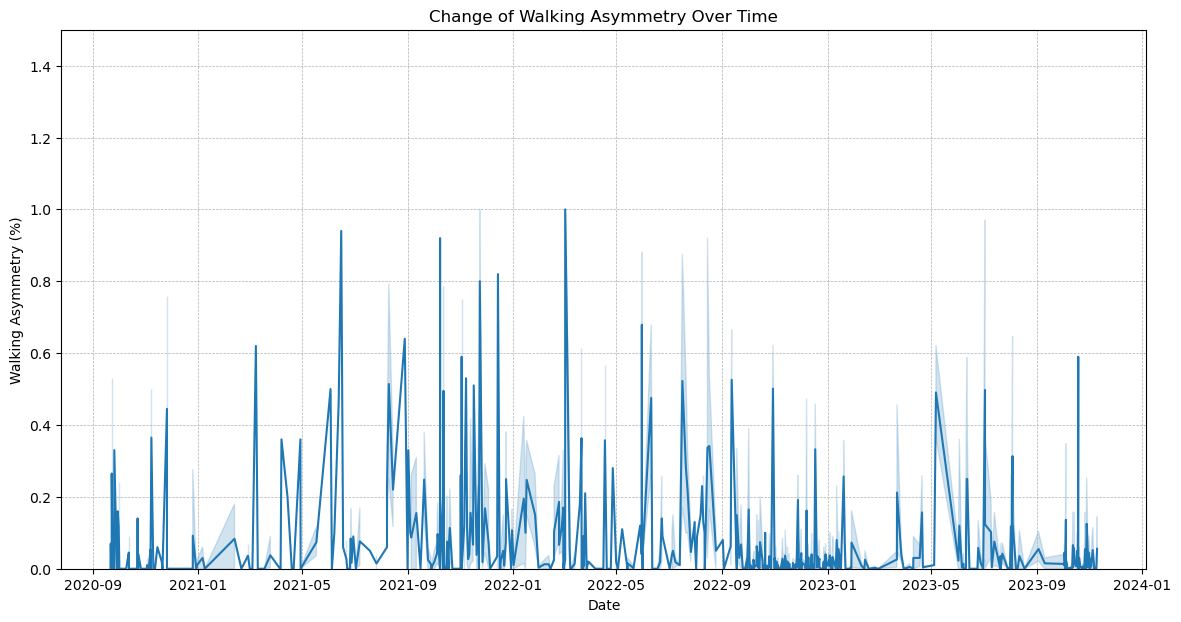

In [124]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_walking_asymmetry["creationDate"], y = my_walking_asymmetry["value"])
plt.title('Change of Walking Asymmetry Over Time')
plt.ylim(0, 1.5)
plt.xlabel('Date')
plt.ylabel('Walking Asymmetry (' + my_walking_asymmetry["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


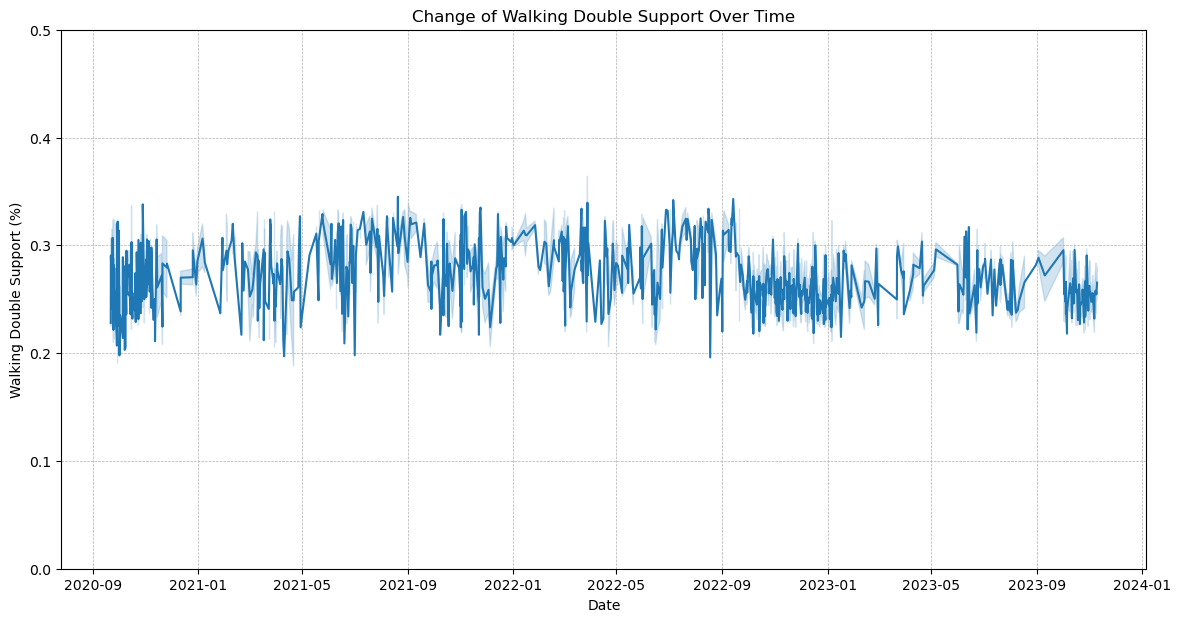

In [125]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_walking_double_support["creationDate"], y = my_walking_double_support["value"])
plt.title('Change of Walking Double Support Over Time')
plt.ylim(0, 0.5)
plt.xlabel('Date')
plt.ylabel('Walking Double Support (' + my_walking_double_support["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


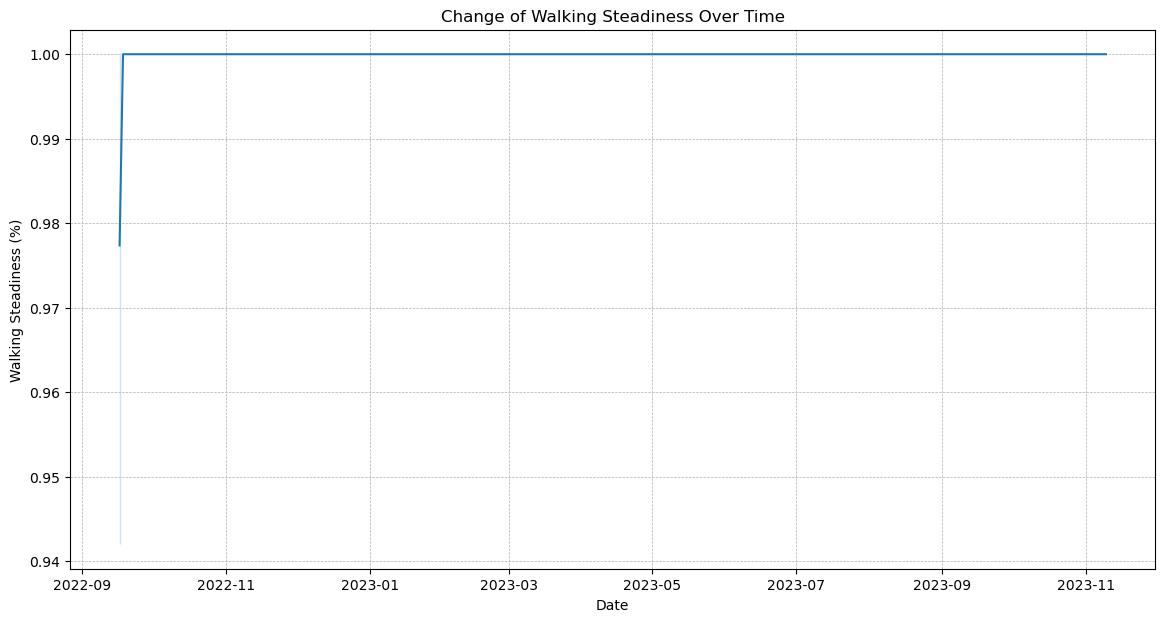

In [126]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = my_walking_steady["creationDate"], y = my_walking_steady["value"])
plt.title('Change of Walking Steadiness Over Time')
plt.xlabel('Date')
plt.ylabel('Walking Steadiness (' + my_walking_steady["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Dataframes related to burned energy statistics

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


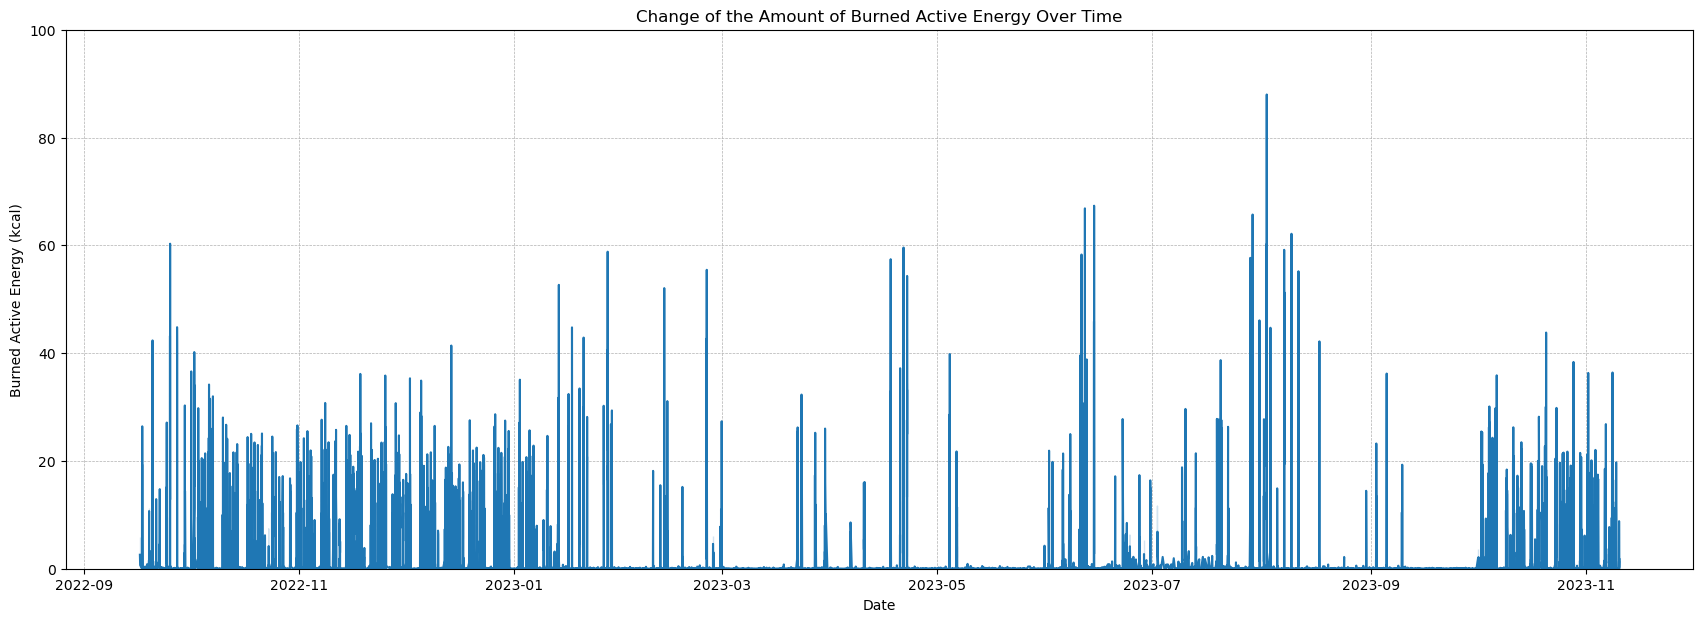

In [127]:
plt.figure(figsize=(21, 7))
sns.lineplot(x = my_active_energy["creationDate"], y = my_active_energy["value"])
plt.title('Change of the Amount of Burned Active Energy Over Time')
plt.ylim(0, 100)
plt.xlabel('Date')
plt.ylabel('Burned Active Energy (' + my_active_energy["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


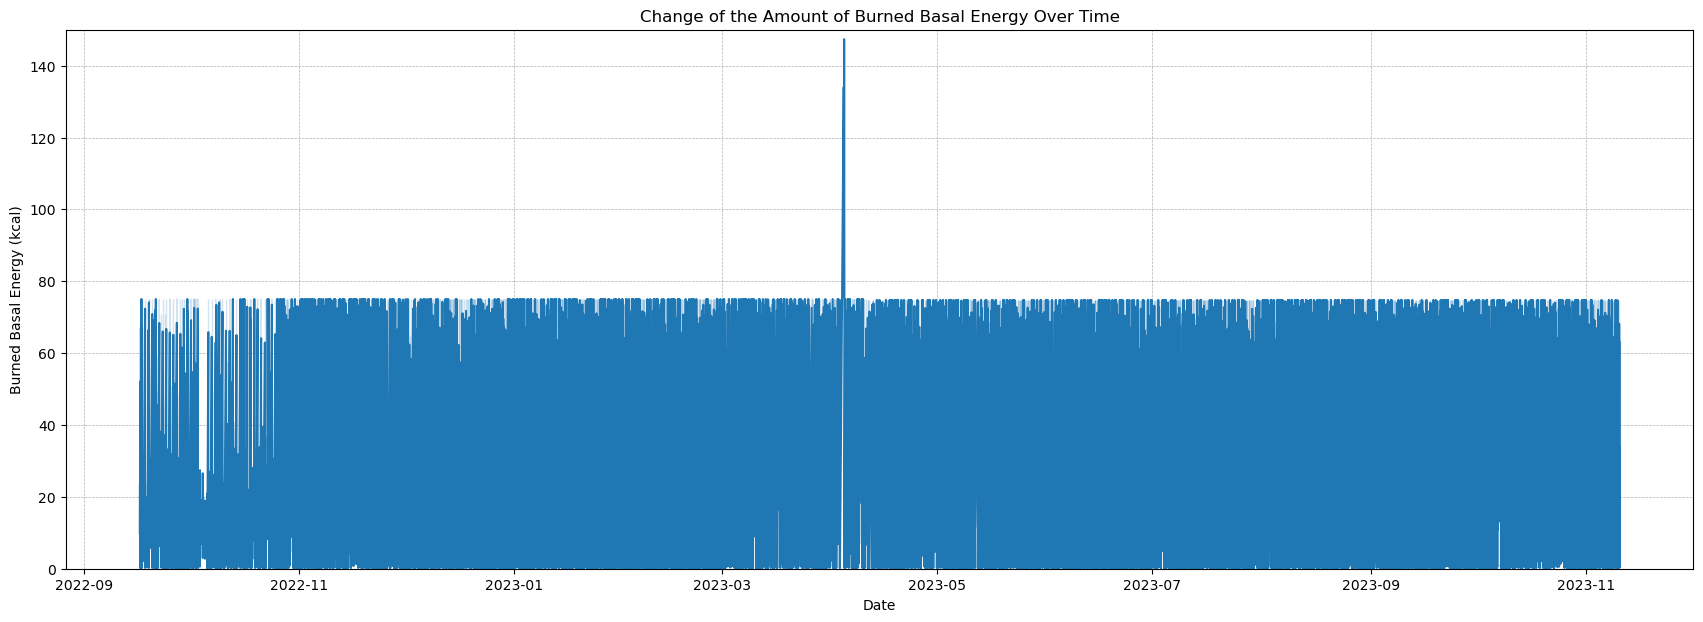

In [128]:
plt.figure(figsize=(21, 7))
sns.lineplot(x = my_basal_energy["creationDate"], y = my_basal_energy["value"])
plt.title('Change of the Amount of Burned Basal Energy Over Time')
plt.ylim(0, 150)
plt.xlabel('Date')
plt.ylabel('Burned Basal Energy (' + my_basal_energy["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Dataframes related to headphone audio statistics

/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurorman/anaconda3/envs/data_ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


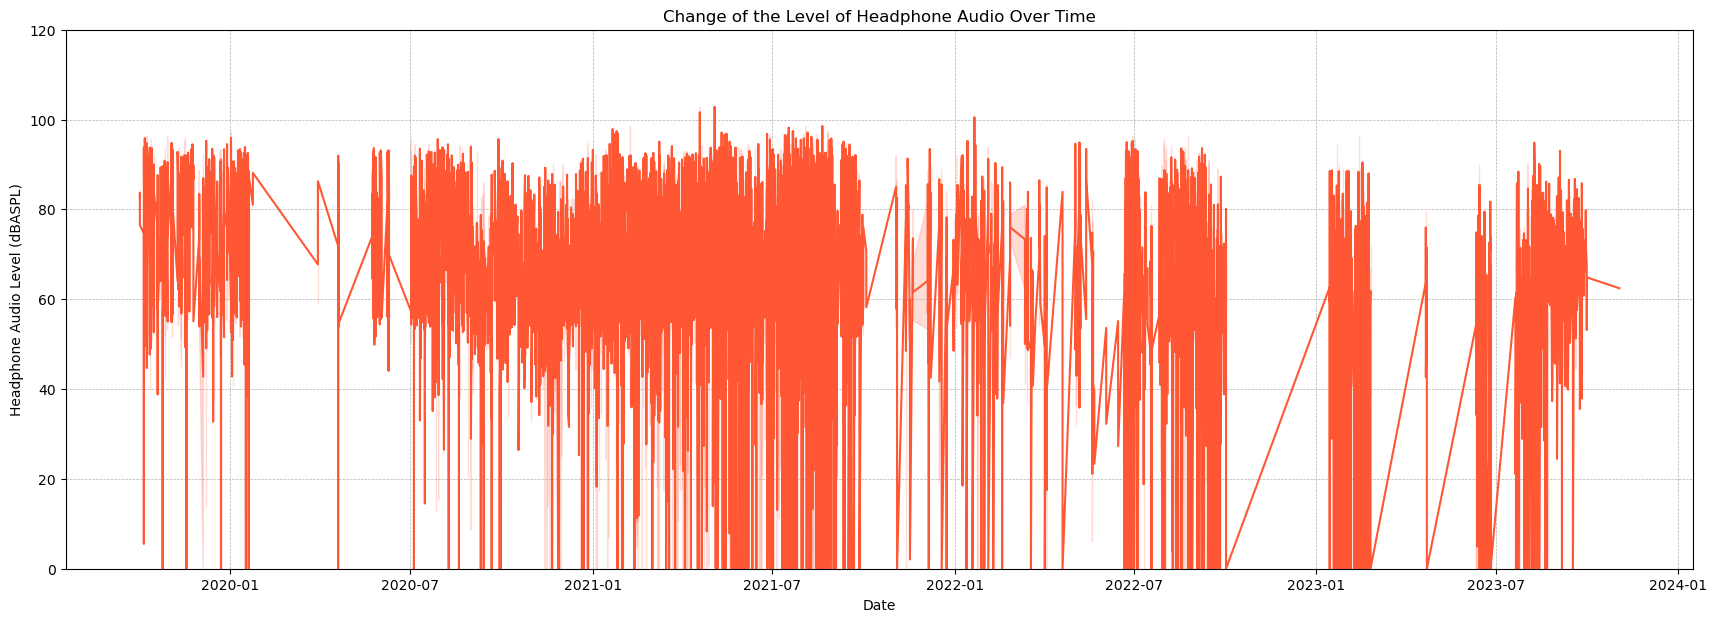

In [129]:
plt.figure(figsize=(21, 7))
sns.lineplot(x = my_headphone_audio["creationDate"], y = my_headphone_audio["value"], color = "#FF5733", legend = False)
plt.title('Change of the Level of Headphone Audio Over Time')
plt.ylim(0, 120)
plt.xlabel('Date')
plt.ylabel('Headphone Audio Level (' + my_headphone_audio["unit"][0] + ")")
#plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Some relations between different categories of data

#### The relationship between the step counts and the walking and running distance

The scatter plot demonstrating the relationship (including outliers)

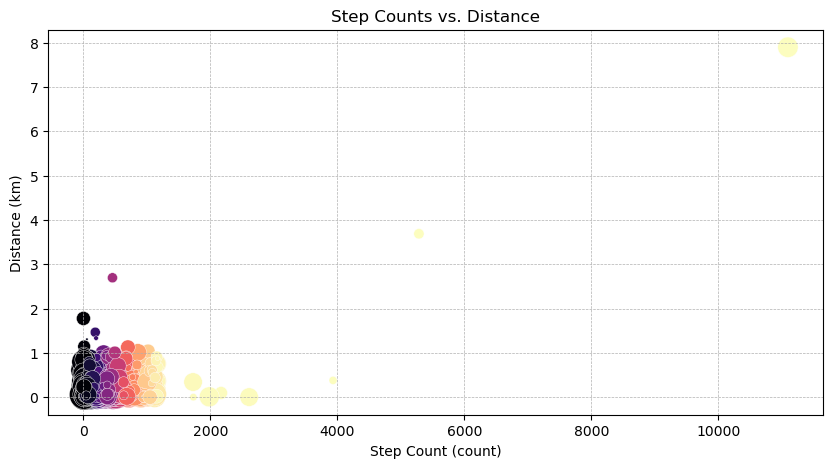

In [130]:
random_colors = sns.color_palette("magma", n_colors = 1008)
rand_s = np.abs(np.random.randn(min(len(my_steps), len(my_distances)))) * 100
plt.figure(figsize=(10, 5))
sns.scatterplot(x = my_steps["value"], y = my_distances["value"], marker='o', palette = random_colors, hue = my_steps["value"], s = rand_s, legend = False)
plt.title('Step Counts vs. Distance')
#plt.xlim(0, 2000)
#plt.ylim(0, 3)
plt.xlabel("Step Count (" + my_steps["unit"][0] + ")")
plt.ylabel("Distance (" + my_distances["unit"][0] + ")")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The scatter plot demonstrating the relationship (not including outliers)

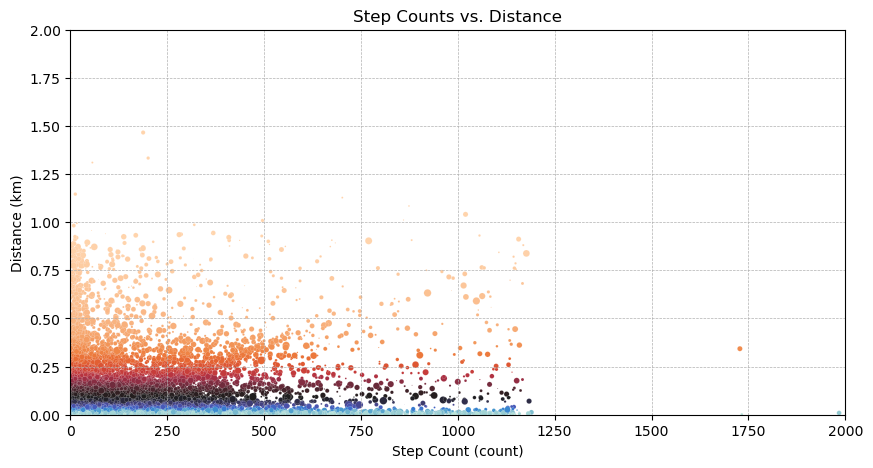

In [131]:
random_colors = sns.color_palette("icefire", n_colors = 11562)
rand_s = np.abs(np.random.randn(min(len(my_steps), len(my_distances)))) * 10
plt.figure(figsize=(10, 5))
sns.scatterplot(x = my_steps["value"], y = my_distances["value"], marker='o', palette = random_colors, hue = my_distances["value"], s = rand_s, legend = False)
plt.title('Step Counts vs. Distance')
plt.xlim(0, 2000)
plt.ylim(0, 2)
plt.xlabel("Step Count (" + my_steps["unit"][0] + ")")
plt.ylabel("Distance (" + my_distances["unit"][0] + ")")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### The relationship between the step length and the step counts

The scatter plot demonstrating the relationship (including outliers)

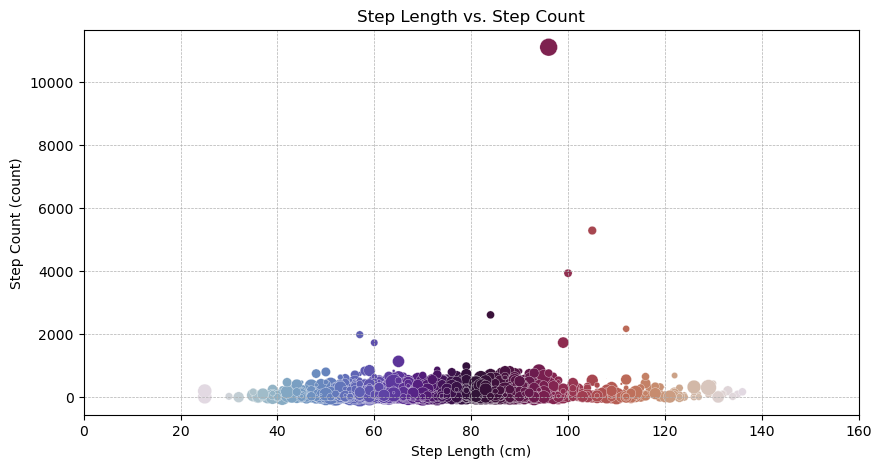

In [132]:
random_colors = sns.color_palette("twilight", as_cmap= True, n_colors = min(len(my_steps), len(my_step_length)))
rand_s = np.abs(np.random.randn(min(len(my_steps), len(my_step_length)))) * 50
plt.figure(figsize=(10, 5))
sns.scatterplot(x = my_step_length["value"], y = my_steps["value"], marker='o', palette = random_colors, hue = my_step_length["value"], s = rand_s, legend = False)
plt.title('Step Length vs. Step Count')
#plt.ylim(0, 2000)
plt.xlim(0, 160)
plt.xlabel("Step Length (" + my_step_length["unit"][0] + ")")
plt.ylabel("Step Count (" + my_steps["unit"][0] + ")")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The scatter plot demonstrating the relationship (not including outliers)

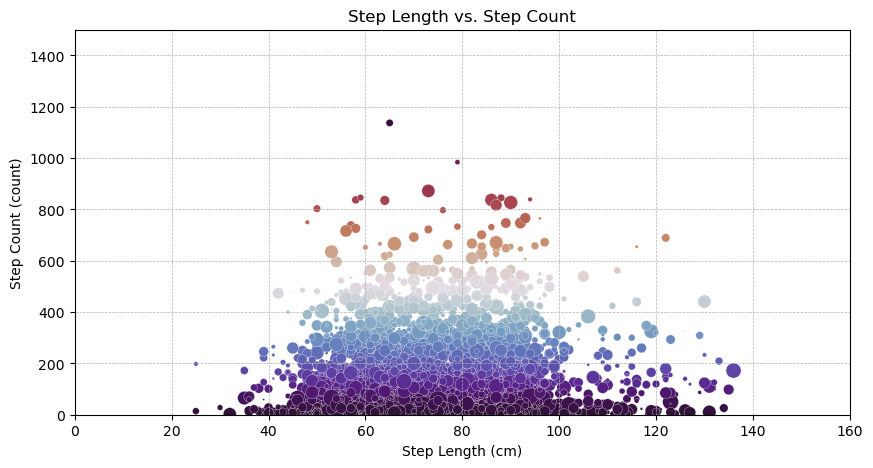

In [133]:
random_colors = sns.color_palette("twilight_shifted", n_colors = 1008)
rand_s = np.abs(np.random.randn(min(len(my_steps), len(my_step_length)))) * 50
plt.figure(figsize=(10, 5))
sns.scatterplot(x = my_step_length["value"], y = my_steps["value"], marker='o', palette = random_colors, hue = my_steps["value"], s = rand_s, legend = False)
plt.title('Step Length vs. Step Count')
plt.ylim(0, 1500)
plt.xlim(0, 160)
plt.xlabel("Step Length (" + my_step_length["unit"][0] + ")")
plt.ylabel("Step Count (" + my_steps["unit"][0] + ")")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### The relationship between the step length and the walking and running distance

The scatter plot demonstrating the relationship (including outliers)

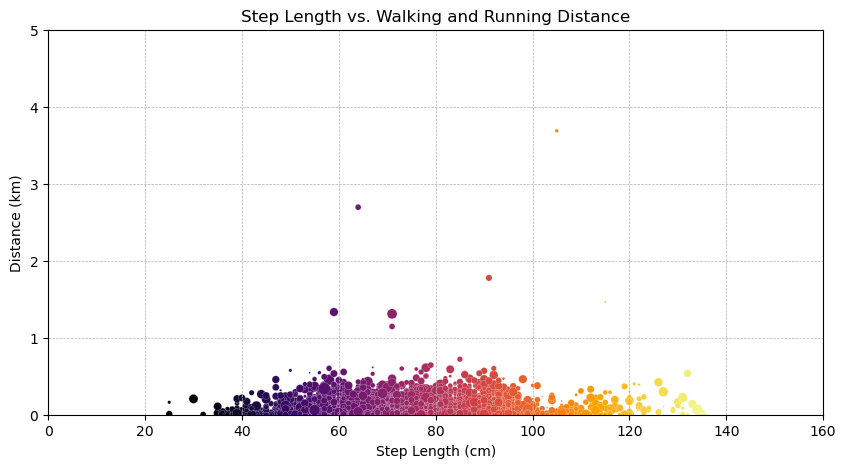

In [134]:
random_colors = sns.color_palette("inferno", n_colors = 103)
rand_s = np.abs(np.random.randn(min(len(my_steps), len(my_step_length)))) * 25
plt.figure(figsize=(10, 5))
sns.scatterplot(x = my_step_length["value"], y = my_distances["value"], marker='o', palette = random_colors, hue = my_step_length["value"], s = rand_s, legend = False)
plt.title('Step Length vs. Walking and Running Distance')
plt.ylim(0, 5)
plt.xlim(0, 160)
plt.xlabel("Step Length (" + my_step_length["unit"][0] + ")")
plt.ylabel("Distance (" + my_distances["unit"][0] + ")")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The scatter plot demonstrating the relationship (not including outliers)

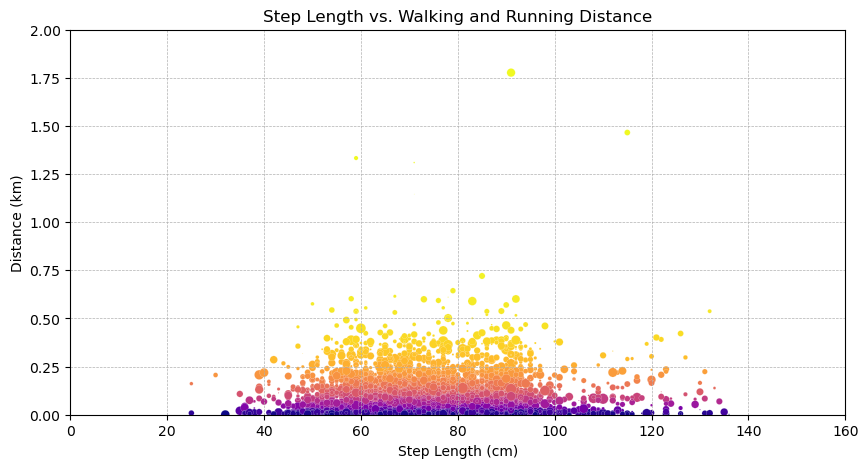

In [135]:
random_colors = sns.color_palette("plasma", n_colors = 11562)
rand_s = np.abs(np.random.randn(min(len(my_steps), len(my_step_length)))) * 20
plt.figure(figsize=(10, 5))
sns.scatterplot(x = my_step_length["value"], y = my_distances["value"], marker='o', palette = random_colors, hue = my_distances["value"], s = rand_s, legend = False)
plt.title('Step Length vs. Walking and Running Distance')
plt.ylim(0, 2)
plt.xlim(0, 160)
plt.xlabel("Step Length (" + my_step_length["unit"][0] + ")")
plt.ylabel("Distance (" + my_distances["unit"][0] + ")")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()